<h1>Working with Real Data</h1>
<p>To find the real data I explored the many data sets in the sites like: </p>
<ul>
<li><a href="https://archive.ics.uci.edu/">UC Irvine Machine Learning Repository</a></li>
<li><a href="https://www.kaggle.com/datasets">Kaggle dataset</a></li>
<li><a href="https://registry.opendata.aws/">Amazon datasets</a></li>
</ul>
<p>While I'm exploring in the Kaggle i found a cleaned data set of Laptop and It's Sales Price Predicition</p>
<p>In this project we are going to build a project based on this</p>

<h2> 1. Get the Data</h2>
<ul>
<li> First, I gathered a dataset that contains details about laptops, such as company, type, RAM, CPU, and price, among other features.</li>
<li> I will load this dataset into a Pandas DataFrame and Google Colab for further analysis.</li>
</ul>
<p>Take a look at dataset <a href="https://www.kaggle.com/datasets/gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset">here</a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')

df = pd.read_csv('laptop_data_cleaned.csv')

<h2>2. Discover and Visualize the Data to Gain Insights</h2>
<ul>
<li>Before proceeding with model training, I will explore the data to understand its structure and the relationships between different features.</li>
<li> I will use visualization libraries like matplotlib and seaborn to create plots, helping to identify patterns, correlations, and outliers.</li>
</ul>

<p>Let's start with the :</p>
<h3>Price distribution (Histogram) :</h3>

In [3]:
df.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


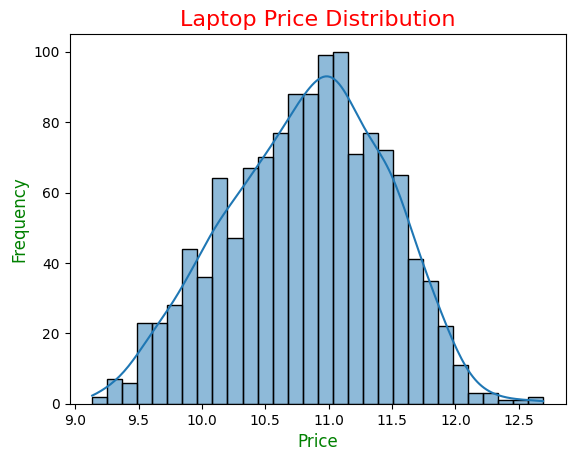

In [5]:
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Laptop Price Distribution', fontsize=16,color="red")
plt.xlabel('Price', fontsize=12,color="green")
plt.ylabel('Frequency', fontsize=12,color="green")
plt.show()

<h3>Insights from the Histogram</h3>
<ul>
<li>Bell-shaped distribution: The price distribution appears to follow a normal distribution, meaning that most laptops are priced around the average (centered around 11).</li>
<li>Symmetry: The distribution is relatively symmetrical, implying no major skewness in the pricing.</li>
</ul>

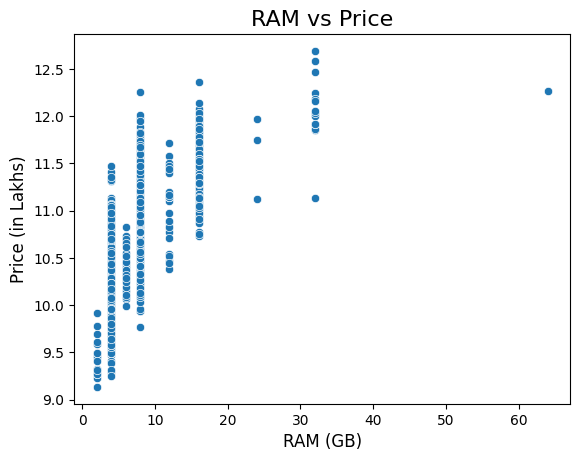

In [6]:
sns.scatterplot(x='Ram', y='Price', data=df)
plt.title('RAM vs Price', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (in Lakhs)', fontsize=12)
plt.show()

<h3>Insights: </h3>
<ul>
<li>Positive Correlation: As the Ram increases then the price in lakhs also increases.</li>
<li>I found one outliner at 64 GB which ranges the cost of above 12 lakhs.</li>
<ul>

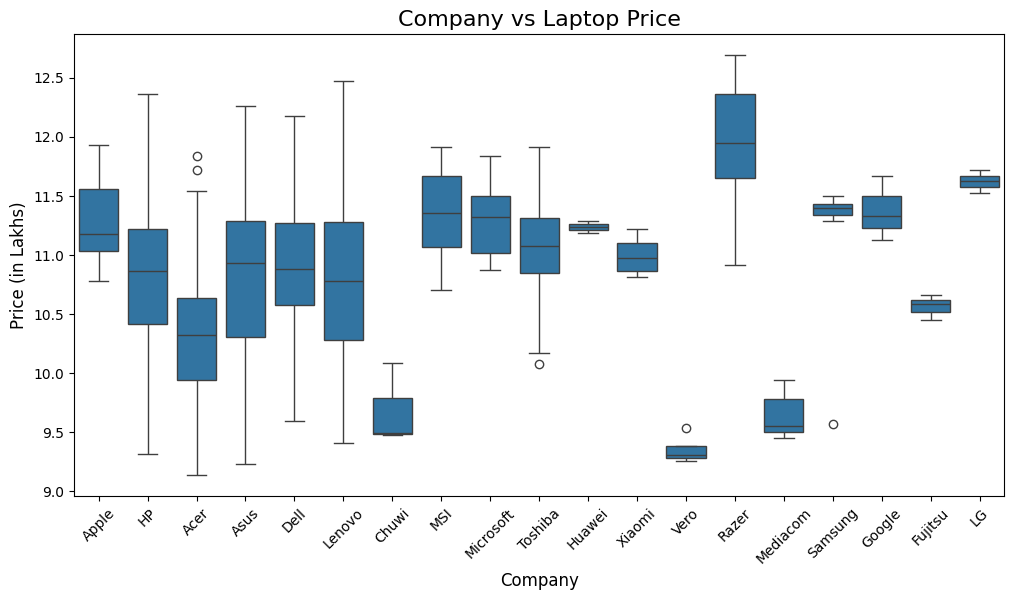

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price', data=df)
plt.title('Company vs Laptop Price', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price (in Lakhs)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<h3>Insights: </h3>
<ul>
<li>Apple and Razer have the highest median prices, with wide variability, indicating that these brands offer a range of laptops from mid-range to high-end.</li>
<li>Chuwi shows a very compact price range, focused entirely in the budget segment.</li>
<ul>

<h2>3. Prepare the Data for Machine Learning Algorithms</h2>
<ul>
<li>I will check for missing data and handle them accordingly</li>
<ul>

<h4>Basic checking for missing values</h4>

In [8]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

<h4>As there is no null values. We should train a model</h4>

<h3>Performing One-hot encoding for the categorical columns</h3>

In [9]:
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], drop_first=True)

<h3>Normalizing the data</h3>

In [10]:
from sklearn.preprocessing import RobustScaler
numerical_features = ['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']
scaler = RobustScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head(5)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,0.0,-0.827160,0.337196,0.0,1.0,2.857620,0.0,-0.5,True,False,...,True,False,False,True,False,False,True,False,False,False
1,0.0,-0.864198,-0.106079,0.0,0.0,-0.450912,0.0,-1.0,True,False,...,True,False,False,True,False,False,True,False,False,False
2,0.0,-0.222222,-0.602537,0.0,0.0,0.000000,0.0,0.0,False,False,...,False,False,False,True,False,False,True,False,True,False
3,2.0,-0.259259,1.046833,0.0,1.0,2.642780,0.0,1.0,True,False,...,True,False,False,False,True,False,False,False,False,False
4,0.0,-0.827160,0.667556,0.0,1.0,2.857620,0.0,0.0,True,False,...,True,False,False,True,False,False,True,False,False,False


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h3>Dividing the data into features and target variables</h3>

In [12]:
X = df.drop('Price', axis=1) 
y = df['Price']

<h3>I will split the dataset into training and test sets to evaluate model performance.</h3>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Selecting the Model and feeding the data into it</h3>

In [14]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

#Function to remove white spaces if present
def replace_whitespace(df):
    df.columns=df.columns.str.replace(' ','_')
    return df

X_train=replace_whitespace(X_train)

<h2>Step 4: Train the model</h2>

In [15]:
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05)
lgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],        
              eval_metric='mae',                  
              callbacks=[lgb.early_stopping(50),  
                         lgb.log_evaluation(50)]) 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 1018, number of used features: 25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.039217
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.217614	valid_0's l2: 0.0782778
[100]	valid_0's l1: 0.195172	valid_0's l2: 0.0647063
[150]	valid_0's l1: 0.193456	valid_0's l2: 0.0623518
[200]	valid_0's l1: 0.191502	valid_0's l2: 0.0605695
[250]	valid_0's l1: 0.190509	valid_0's l2: 0.0598434
[300]	valid_0's l1: 0.189867	valid_0's l2: 0.0596458
[350]	valid_0's l1: 0.187783	valid_0's l2: 0.0588333
[400]	valid_0's l1: 0.187227	valid_0's l2: 0.058324
[450]	valid_0's l1: 0.187052	val

LGBMRegressor(learning_rate=0.05, n_estimators=1000)

<h3>Make Predictions on test set</h3>

In [16]:
y_pred = lgb_model.predict(X_test)
print(y_pred)

[-3.81469844e-01  4.61114981e-01  3.22497919e-01  4.74718706e-01
 -6.97754280e-02  8.33687224e-01 -1.36905330e+00 -1.05802795e+00
  1.23886283e-01  1.24054186e+00 -7.53185939e-02 -8.12825675e-02
  1.29155602e-01 -7.49621369e-01  4.52948039e-01  8.02369190e-01
  6.07533740e-01 -7.55334717e-01  9.87109320e-01  6.80485279e-01
 -1.58294731e+00 -1.08521593e-01 -1.93089655e-01  5.56576506e-01
 -7.95603434e-01  9.68309399e-01 -2.69387804e-01  2.49197788e-01
  3.05431305e-01  2.69502921e-02 -9.95408734e-02  1.84919866e-02
 -6.28742433e-01 -6.04048802e-01  5.96118208e-01 -2.09079523e-01
 -2.58657927e-01  6.66929449e-02  6.29849913e-01 -8.06082621e-01
 -7.78779945e-01  9.99649221e-01  1.86026073e-01  4.20377624e-01
 -7.65773480e-01  4.89935970e-01  5.90552063e-01 -5.84156851e-01
  3.10989640e-01  1.42289391e-01  2.23862359e-01  6.66757672e-01
 -1.03003239e-01 -9.27216612e-01  1.05810582e-01  8.14801703e-02
  6.24570113e-01 -6.92508916e-01  5.30658724e-02  1.57109198e+00
  9.19960282e-01  2.63844

<h3>Evaluating the model</h3>

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.18596491176771676
Mean Squared Error (MSE): 0.057420987807370545
Root Mean Squared Error (RMSE): 0.23962676771882258
R^2 Score: 0.8825669234322726


<h3>Plotting the graph between Actual outputs and predicted outputs</h3>

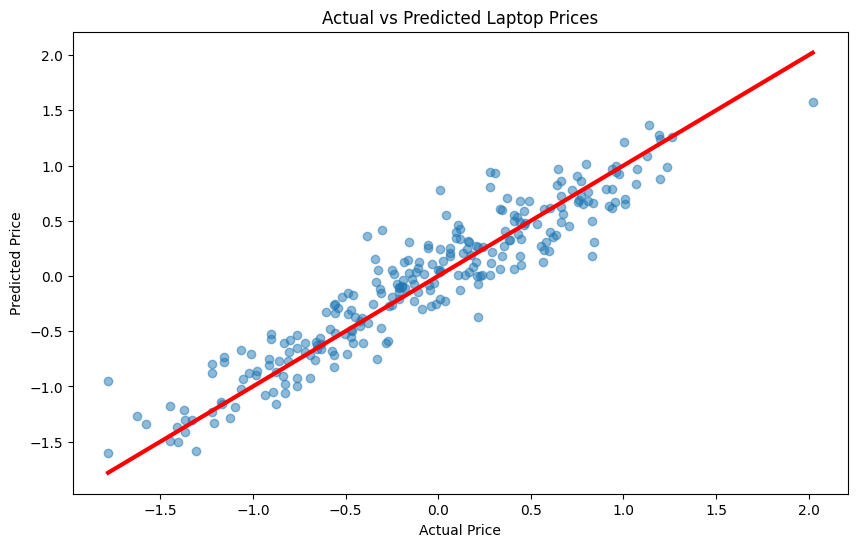

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

<h4>As we can see that we are getting the accuracy is 88.16%. We try to tune the parameters</h4>
<h2>Step 5: Fine tuning of model</h2>
<ul>
    <li>I will use techniques such as RandomizedSearchCV to find the best hyperparameters for the models.</li>
    <li>Fine-tuning the model will help in improving its accuracy and preventing overfitting.</li>
</ul>

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

In [20]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [20, 30, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

lgb_model = lgb.LGBMRegressor()

random_search = RandomizedSearchCV(
    estimator=lgb_model, 
    param_distributions=param_grid, 
    n_iter=50,                # Number of random combinations to try
    scoring='neg_mean_absolute_error',  # Or another metric
    cv=5,                     # 5-fold cross-validation
    verbose=1,                # Display progress
    random_state=42,          # Ensure reproducibility
    n_jobs=-1                 # Use all processor
)

# Fit the randomized search on the training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1018, number of used features: 27
[LightGBM] [Info] Start training from score -0.039217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [20, 30, 50],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

<h3>Best parameters and best score</h3>

In [21]:
print("Best parameters found: ", random_search.best_params_)
print("Best MAE score: ", -random_search.best_score_)

Best parameters found:  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'num_leaves': 50, 'n_estimators': 1000, 'min_child_samples': 10, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best MAE score:  0.17910600287751302


<h3>Evaluate the best model on the test set</h3>

In [22]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

<h2>6. Evaluate the Final Model</h2>

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Mean Absolute Error: {mae}")
print("Mean Squared Error: {mse}")
print(f"Root mean square error: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R square is : {r2}")

Mean Absolute Error: 0.26623900931489153
Mean Squared Error: {mse}
Root mean square error: 0.34391660065291796
R square is : 0.8854729680026965
